## Forward Propagation

![Imagen 1](Images/imag001.png?raw=true)

Neural Network have 1 input Layer, 1 hidden Layer, and 1 output Layer

In [19]:
import numpy as np
# X = (hours sleeping, hours studying), y = Score on test
X = np.array([[3, 5], [5, 1], [10, 2]], dtype=float)
y = np.array([[75], [82], [93]], dtype=float)

# Scale data
X = X/ np.amax(X, axis=0)
y = y/100

In [20]:
print(X)
print(y)

[[ 0.3  1. ]
 [ 0.5  0.2]
 [ 1.   0.4]]
[[ 0.75]
 [ 0.82]
 [ 0.93]]


### Construction of NeuralNetwork

In [21]:
class NeuralNetwork(object):
    def __init__(self):
        # Define Hyperparameters
        self.inputLayerSize = 2
        self.hiddenLayerSize = 3
        self.outputLayerSize = 1
        
        # Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize, self.outputLayerSize)
        
    def forwardPropagation(self, X):
        # Propagate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3)
        return yHat
    
    def sigmoid(self, z):
        # Apply sigmoid activation function to scalar, vector, or Matrix
        return 1/(1+np.exp(-z))

![Imagen 2](Images/imag003.png?raw=true)

#### Architecture of Neural Network

![Imagen 3](Images/imag002.png?raw=true)

#### Calculate from Input to Hidden Layer.

![Imagen 1](Images/imag004.png?raw=true)

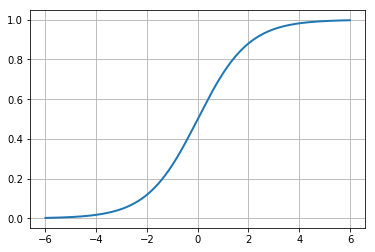

In [22]:
import matplotlib.pyplot as plt
NN = NeuralNetwork()
testInput = np.arange(-6, 6, 0.01)
plt.plot(testInput, NN.sigmoid(testInput), linewidth=2)
plt.grid(1)
plt.show()

In [23]:
NN.sigmoid(1)

0.7310585786300049

In [24]:
NN.sigmoid(np.array([-1, 0, 1]))

array([ 0.26894142,  0.5       ,  0.73105858])

In [25]:
NN.sigmoid(np.random.randn(3, 3))

array([[ 0.26710084,  0.12445003,  0.40617971],
       [ 0.534376  ,  0.64288305,  0.24772018],
       [ 0.89003903,  0.24228   ,  0.47115939]])

![Imagen 5](Images/imag005.png?raw=true)

### Try our Neural Network

In [61]:
X

array([[ 0.3,  1. ],
       [ 0.5,  0.2],
       [ 1. ,  0.4]])

In [62]:
NN = NeuralNetwork()
yHat = NN.forwardPropagation(X)
yHat

array([[ 0.26045552],
       [ 0.24018001],
       [ 0.21630116]])

In [63]:
y

array([[ 0.75],
       [ 0.82],
       [ 0.93]])

In [78]:
error = 0.5 * np.sum((y-yHat)**2)
error

0.54260552692020303

Note that out estimes (yHat) looks quite terrible when compared with our target (y). That is because we have not yet trained out network, that is what we will work.

We are going to plot some bars to compare y and yHat

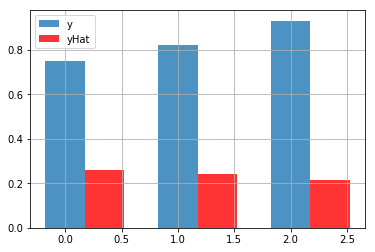

In [76]:
import matplotlib.pyplot as plt
plt.bar([0, 1, 2], y, width=0.35, alpha=0.8)
plt.bar([0.35, 1.35, 2.35], yHat, width=0.35, color='r', alpha=0.8)
plt.grid(1)
plt.legend(['y', 'yHat'])
plt.show()

## Cost Function $J$

To improve our model, we need to find a way to quantify exactly how wrong out predictions are.

One way of doing it is to use a **cost function**. 

We will use sum of square errors to compute an overall cost and we will try to minimize it. Actually, **training a network means minimizing a cost function**.

![Imagen 6](Images/imag006.png?raw=true)

The cost is a function depends of two parameters: out **sample data** and the **weights**.

We will try to minimze out cost by changing the **weights**.

![Imagen 7](Images/imag007.png?raw=true)

We are going to make out cost ($J$) as small as possible with a optimal combination of the weights.

## Gradient Descent

### 1. Batch Gradient Descent Algorithm

Gradient descent is an optimization algorithm that works by efficiently search the parameter space, intercept($\theta_0$) and slope($\theta_1$) for linear regression, according to the following rule:

![Imagen 8](Images/imag008.png?raw=true)

The $J(\theta)$ is knows as the cost funcftion and $\alpha$ is the learning rate, a free parameter. We are going to use least square cost function defined as following. 

> ## $J(\theta) =  \frac{1}{2m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^2$

where *m* is the total number of training examples and $h_{\theta}(x^{(i)})$ is the hypothesis function defined like this:

> ## $h_{\theta}(x^{(i)}) = \theta_{0} + \theta_{1}x^{(i)}$

where the super script (i) is used to denote the $i^{th}$ sample (we will sabe subscripts for the index to a feature when we deal with multi-features).

We need derivates for both $\theta_{0}$ and $\theta_{1}$:

Derivative by $\theta_{0}$
> ### $\frac{\partial}{\partial\theta_{0}} J(\theta_{0},\theta_{1}) = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)}) = \frac{1}{m} \sum_{i=1}^{m} (\theta_{0}+\theta_{1}x^{(i)}-y^{(i)})$ 

Derivative by $\theta_{1}$
>### $\frac{\partial}{\partial\theta_{1}} J(\theta_{0},\theta_{1}) = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)}) = \frac{1}{m}\sum_{i=1}^{m} (\theta_{0}+\theta_{1}x^{(i)}-y^{(i)})x^{(i)}$

x.shape = (100, 1) y.shape = (100,)
Converged, iterations:  643 !!!
theta0 = [-2.8196842], theta1 = [ 43.13927567]
intercept = -2.84963639461, slope = 43.2042438802


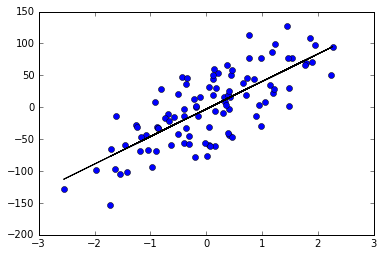

Done!


In [34]:
# CODE A, NATIVE PYTHON

import numpy as np
import random
import sklearn
from sklearn.datasets.samples_generator import make_regression
import pylab
from scipy import stats

def gradient_descent(alpha, x, y, eps=0.0001, max_iter=10000):
    converged = False
    iter = 0
    m = x.shape[0] # number of samples
    
    # initial theta
    t0 = np.random.random(x.shape[1])
    t1 = np.random.random(x.shape[1])
    
    # total error, J(theta)
    J = sum([(t0 + t1*x[i] - y[i]) ** 2 for i in range(m)])
    
    # Iterative Loop
    while not converged:
        # for each training sample, compute the gradient (d/d_theta j(theta))
        grad0 = 1.0/m * sum([(t0 + t1*x[i] - y[i]) for i in range(m)]) 
        grad1 = 1.0/m * sum([(t0 + t1*x[i] - y[i])*x[i] for i in range(m)])
        
        # update the theta_temp
        temp0 = t0 - alpha * grad0
        temp1 = t1 - alpha * grad1
        
        # update theta
        t0 = temp0
        t1 = temp1
        
        # mean squared error
        e = sum( [ (t0 + t1*x[i] - y[i]) ** 2 for i in range(m) ] )
        
        if abs(J - e) <= eps:
            print('Converged, iterations: ', iter, '!!!')
            converged = True
            
        J = e # update error
        iter += 1 # update iter
        
        if iter == max_iter:
            print('Max iteractions exceeded!')
            converged = True 
        
    return t0, t1

if __name__ == '__main__':
    
    x, y = make_regression(n_samples=100, n_features=1, n_informative=1,
                          random_state=0, noise=35)
    print('x.shape = %s y.shape = %s' %(x.shape, y.shape))
    
    alpha = 0.01 # Learning rate
    eps = 0.01 # convergence criteria
    
    # call gradient descent, and get intercept(=theta0) and slope(=theta1)
    theta0, theta1 = gradient_descent(alpha, x, y, eps, max_iter=1000)
    print('theta0 = %s, theta1 = %s' %(theta0, theta1))
    
    #check with scipy linear regression
    slope, intercepts, r_value, p_value, slope_std_error = stats.linregress(x[:, 0], y)
    print('intercept = %s, slope = %s' %(intercepts, slope))
    
    # plot
    for i in range(x.shape[0]):
        y_predict = theta0 + theta1*x
        
    pylab.plot(x, y, 'o')
    pylab.plot(x, y_predict, 'k-')
    pylab.show()
    print('Done!')                                  

We have made an temporal variables to save slope and intercepts updated.

> ### $temp0 := \theta_{0} - \alpha \frac{\partial}{\partial\theta_{0}} J(\theta_{0}, \theta_{1})$

> ### $temp1 := \theta_{1} - \alpha \frac{\partial}{\partial\theta_{1}} J(\theta_{0}, \theta_{1})$

> ### $\theta_{0} := temp0$

> ### $\theta_{1} := temp1$

iter 0 | J: 1604.873
iter 1 | J: 1586.636
iter 2 | J: 1568.768
iter 3 | J: 1551.261
iter 4 | J: 1534.107
iter 5 | J: 1517.301
iter 6 | J: 1500.833
iter 7 | J: 1484.699
iter 8 | J: 1468.890
iter 9 | J: 1453.401
iter 10 | J: 1438.224
iter 11 | J: 1423.354
iter 12 | J: 1408.785
iter 13 | J: 1394.509
iter 14 | J: 1380.522
iter 15 | J: 1366.817
iter 16 | J: 1353.389
iter 17 | J: 1340.232
iter 18 | J: 1327.341
iter 19 | J: 1314.710
iter 20 | J: 1302.334
iter 21 | J: 1290.207
iter 22 | J: 1278.325
iter 23 | J: 1266.683
iter 24 | J: 1255.276
iter 25 | J: 1244.100
iter 26 | J: 1233.148
iter 27 | J: 1222.418
iter 28 | J: 1211.904
iter 29 | J: 1201.602
iter 30 | J: 1191.507
iter 31 | J: 1181.617
iter 32 | J: 1171.926
iter 33 | J: 1162.430
iter 34 | J: 1153.126
iter 35 | J: 1144.009
iter 36 | J: 1135.076
iter 37 | J: 1126.323
iter 38 | J: 1117.747
iter 39 | J: 1109.343
iter 40 | J: 1101.109
iter 41 | J: 1093.041
iter 42 | J: 1085.135
iter 43 | J: 1077.389
iter 44 | J: 1069.799
iter 45 | J: 1062.36

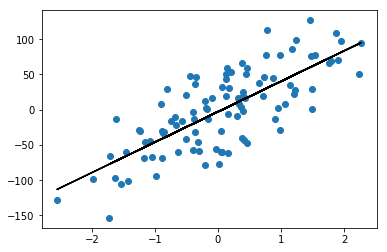

Done!


In [1]:
# CODE A, NUMPY PYTHON

import numpy as np
import random
from sklearn.datasets.samples_generator import make_regression 
import pylab
from scipy import stats

def gradient_descent_2(alpha, x, y, numIterations):
    m = x.shape[0] # number of samples
    theta = np.ones(2)
    x_transpose = x.transpose()
    for iter in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        J = np.sum(loss ** 2) / (2 * m)  # cost
        print ("iter %s | J: %.3f" % (iter, J) )
        gradient = np.dot(x_transpose, loss) / m         
        theta = theta - alpha * gradient  # update
    return theta

if __name__ == '__main__':

    x, y = make_regression(n_samples=100, n_features=1, n_informative=1, 
                        random_state=0, noise=35) 
    m, n = np.shape(x)
    x = np.c_[ np.ones(m), x] # insert column
    alpha = 0.01 # learning rate
    theta = gradient_descent_2(alpha, x, y, 1000)
    print('theta = [%s, %s]' %(theta[0], theta[1]))

    # plot
    for i in range(x.shape[1]):
        y_predict = theta[0] + theta[1]*x 
    pylab.plot(x[:,1],y,'o')
    pylab.plot(x,y_predict,'k-')
    pylab.show()
    print ("Done!")

### 2. Stochastic Gradient Descent Algorithm (SGD)

Typically reaches convergence muhc faster than **batch (or standard)** gradient descent since it updated weight more frequently.

En cambio, **batch gradient descent** which computes the gradient using the whole dataset, because the **SGD**, also known as **incremental gradient descent**, tries to find minimums or maximums y iteration from a **single** randomly picked training example, the error is typically noisier than in gradient descent.

However, this can also have advantage that ``stochastic gradient descent can escape shallow local minima more easily``.

In orden to obtain accurate results with stochastic gradient descent, the data sample should be in a random order, and this is why we want to shuffle the training set for every epoch.

![Imagen 009](Images/imag009.png?raw=true)

The **cost function** to learn the weights for **Adaline (Adaptive Linear Neuron)** is defined by associating with *i*-th observation in the training data set as:

> ### $J(w) = \frac{1}{2}\sum_{i=1}^{N}(y^{(i)} - \phi(w^{T}x)^{(i)})^2$

where the $\phi$ is an activation function.

![Image 10](Images/Imag010.png)

The weight change $\Delta w$ is defined as the negative gradient multiplied by the **learning rate** $\eta$:

> ### $\Delta w = -\eta\nabla J = \eta \sum_{i=1}^{N}(y^{(i)} - \phi(w^{T}x)^{(i)})x^{(i)}$

In order to minimize a cost function, in **batch gradient descent,** the gradient is calculated from the whole training set (this is why this approach is also referred to as "batch")

If we have a huge dataset with millions of data points, running the batch gradient descent can be quite costly since we need to reevaluate the whole training dataset each time we take one step towards the global minimum.

So, in **stochastic gradient descent** method, instead of updating the weights based on the sum of the accumulated errors over all samples **x**$^{(i)}$ via the $(\Delta w)$ defined above, we can use the following update: